DATA CLEANING

In [12]:
#for data wrangling 
import pandas as pd 
import numpy as np 

#for visualization
import matplotlib as plt 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns 

#read the data frame 
df = pd.read_csv('HistoricalQuotes.csv', delimiter=',',parse_dates=['Date'])

#print the dataframe and its shape
print(df,df.shape)

           Date  Close/Last     Volume       Open       High        Low
0    2020-02-28     $273.36  106721200    $257.26    $278.41    $256.37
1    2020-02-27     $273.52   80151380     $281.1       $286    $272.96
2    2020-02-26     $292.65   49678430    $286.53    $297.88     $286.5
3    2020-02-25     $288.08   57668360    $300.95    $302.53    $286.13
4    2020-02-24     $298.18   55548830    $297.26    $304.18    $289.23
...         ...         ...        ...        ...        ...        ...
2513 2010-03-05    $31.2786  224647427   $30.7057   $31.3857   $30.6614
2514 2010-03-04    $30.1014   89591907   $29.8971   $30.1314   $29.8043
2515 2010-03-03    $29.9043   92846488   $29.8486   $29.9814   $29.7057
2516 2010-03-02    $29.8357  141486282     $29.99   $30.1186   $29.6771
2517 2010-03-01    $29.8557  137312041   $29.3928   $29.9286     $29.35

[2518 rows x 6 columns] (2518, 6)


In [13]:
#sort the dataframe by date from earliest to latest and reset the index
df = df.sort_values(by='Date',ascending=True)
df = df.reset_index(drop=True)
print(df)

           Date  Close/Last     Volume       Open       High        Low
0    2010-03-01    $29.8557  137312041   $29.3928   $29.9286     $29.35
1    2010-03-02    $29.8357  141486282     $29.99   $30.1186   $29.6771
2    2010-03-03    $29.9043   92846488   $29.8486   $29.9814   $29.7057
3    2010-03-04    $30.1014   89591907   $29.8971   $30.1314   $29.8043
4    2010-03-05    $31.2786  224647427   $30.7057   $31.3857   $30.6614
...         ...         ...        ...        ...        ...        ...
2513 2020-02-24     $298.18   55548830    $297.26    $304.18    $289.23
2514 2020-02-25     $288.08   57668360    $300.95    $302.53    $286.13
2515 2020-02-26     $292.65   49678430    $286.53    $297.88     $286.5
2516 2020-02-27     $273.52   80151380     $281.1       $286    $272.96
2517 2020-02-28     $273.36  106721200    $257.26    $278.41    $256.37

[2518 rows x 6 columns]


In [14]:
#determine the max and min date
print(df['Date'].min())
print(df['Date'].max())

#roughly 10 years worth of data 

2010-03-01 00:00:00
2020-02-28 00:00:00


In [15]:
#convert the object columns into float by removing $
object_columns = [' Close/Last', ' High', ' Low', ' Open']
df[object_columns] = df[object_columns].apply(lambda x: x.str.strip().str.replace('$', '').astype(float))
print(object_columns)


[' Close/Last', ' High', ' Low', ' Open']


/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_10213/3458879127.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[object_columns] = df[object_columns].apply(lambda x: x.str.strip().str.replace('$', '').astype(float))


In [21]:
#create a function to remove the space in the cols 
def rename_col(df):
    df.columns = df.columns.str.strip()
    return df.columns

#rename the Close/Last column for convenience
df.rename(columns={'Close/Last': 'Close'}, inplace=True)
print(rename_col(df))


Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [22]:
#drop any columns with missing values 
df.dropna()

#check the column for missing values 
print(df.isnull().sum())


Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


No missing values found!

In [23]:
#obtain a broad statistical overview of the dataset
print(df.describe())


             Close        Volume         Open         High          Low
count  2518.000000  2.518000e+03  2518.000000  2518.000000  2518.000000
mean    114.769522  7.258009e+07   114.728443   115.766415   113.690582
std      60.662405  5.663113e+07    60.546893    61.134456    60.085105
min      29.835700  1.136205e+07    29.392800    29.928600    28.464300
25%      66.822475  3.053026e+07    66.877150    67.475300    66.372950
50%     101.090000  5.295469e+07   101.115000   102.085000   100.350000
75%     154.630000  9.861006e+07   154.610000   155.735000   153.325000
max     327.200000  4.624423e+08   324.740000   327.850000   323.350000


In [24]:
#review the columns after the changes
print(df.info()) #df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Close   2518 non-null   float64       
 2   Volume  2518 non-null   int64         
 3   Open    2518 non-null   float64       
 4   High    2518 non-null   float64       
 5   Low     2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB
None


DATA EXPLORATION

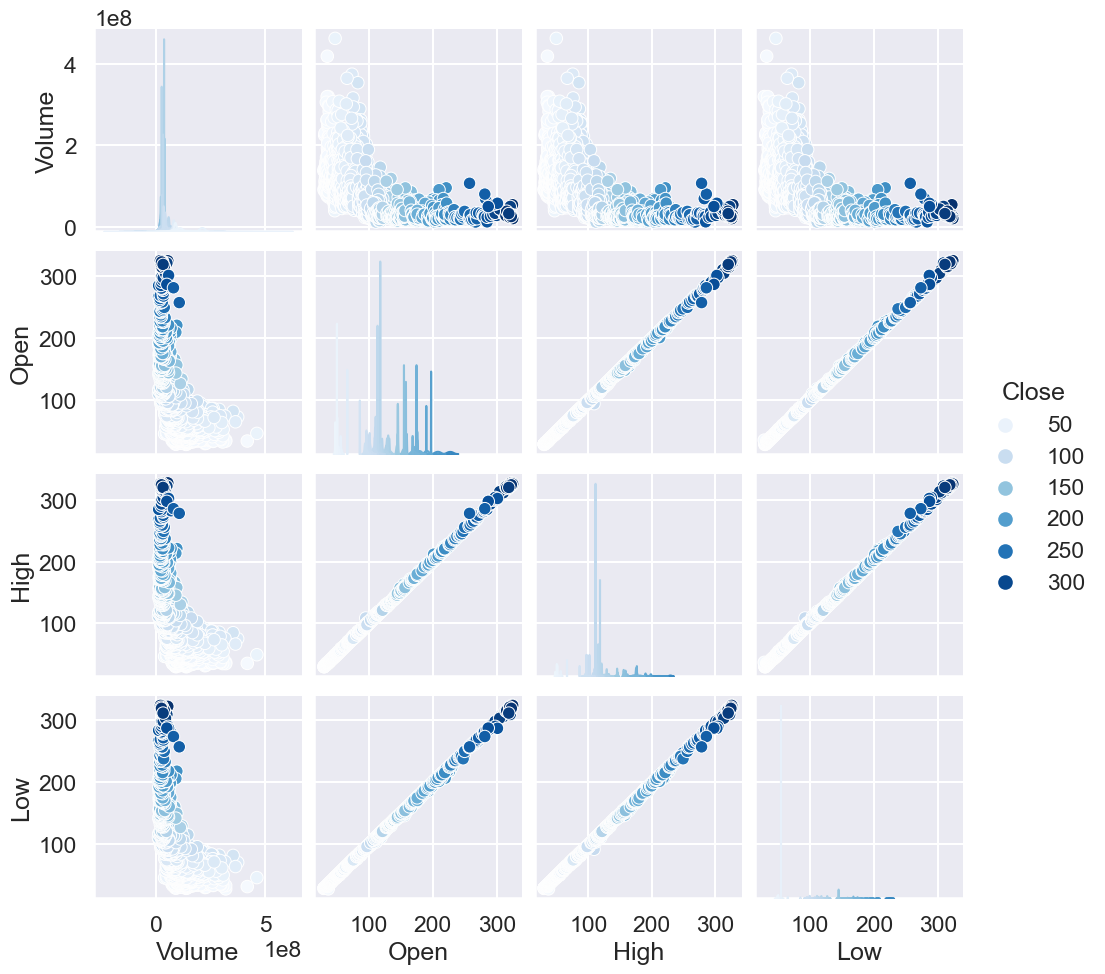

In [25]:
#create the styling for the sns plots 
sns.set_context('talk')
sns.set_style('darkgrid')

#create a distribution plot
sns.pairplot(df, hue='Close', palette='Blues')


In [26]:
#sort the columns most closely correlated to Close in descending order
correlation_matrix = df.corr()['Close'].sort_values(ascending=False)
print(correlation_matrix)

Close     1.000000
Low       0.999842
High      0.999828
Open      0.999653
Volume   -0.608502
Name: Close, dtype: float64


/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_10213/3022561222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()['Close'].sort_values(ascending=False)


Text(0, 0.5, 'Closing Price')

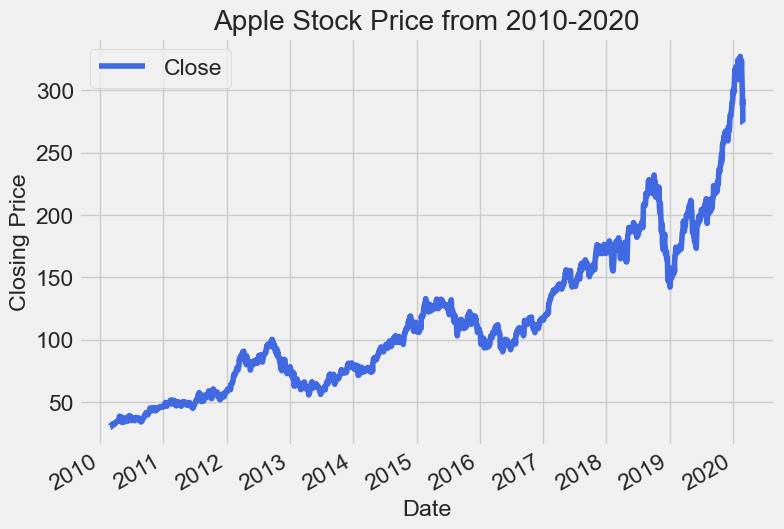

In [27]:
#set the style for matplotlib
plt.style.use('fivethirtyeight')

#plot the graph
df.plot(x='Date',y='Close',color='royalblue',grid=True,figsize=(8,6))
plt.gcf().autofmt_xdate()

#create the title,axis-labels, and legend
plt.title('Apple Stock Price from 2010-2020')
plt.xlabel('Date')
plt.ylabel('Closing Price')


<AxesSubplot: xlabel='Close', ylabel='Density'>

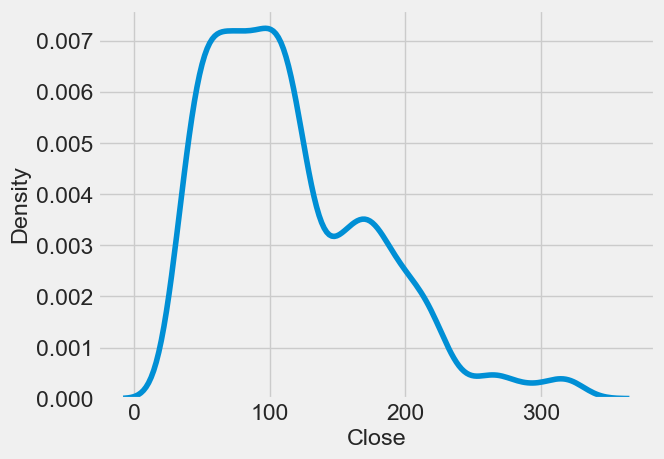

In [28]:
#create a kdeplot for the dataframe columns 
sns.kdeplot(df['Close'])


array([[<AxesSubplot: title={'center': 'Close'}>]], dtype=object)

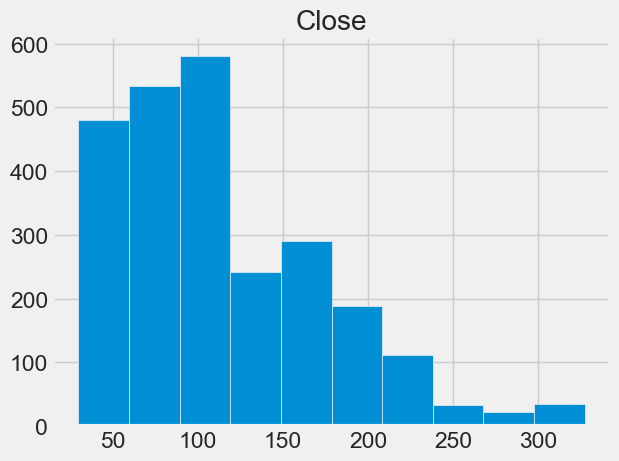

In [29]:
#create a histograms to glimspe at the value distribution
df.hist('Close')

RANDOM FOREST

In [30]:
#import the necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [31]:
#determine the X and Y
features = ["Volume","Open", "High", "Low"]
X = df[features]
Y= df['Close']

In [32]:
#split the data into training, validation, and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

print(f'Training set: {len(X_train)} , Validation set: {len(X_valid)} , Testing set: {len(X_test)}')

Training set: 1611 , Validation set: 403 , Testing set: 504


In [33]:
#standardized the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [34]:
#create the Random Forest model and its hyperparameter
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)


parameter_grid = {
                'n_estimators' : [50,100,200,300],
                'max_depth':[None,5,10,20],
                'min_samples_leaf':[1,5,10,20]

}

In [35]:
#define the kfolds that will be use in cross-validation
kfold = KFold(n_splits=3)

#use grid search to find the optimal combination
grid_search = GridSearchCV(estimator=rf, param_grid=parameter_grid,cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(np.concatenate((X_train_scaled, X_valid_scaled)), np.concatenate((y_train, y_valid)))


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [36]:
#get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

#print the evaluation metrics 
print(f'Best Hyperparameters: {best_params}' )
print(f'MSE score: {mean_squared_error(y_test,y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test,y_pred)}')
print(f'R^2 score: {r2_score(y_test,y_pred)}')



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
MSE score: 0.8233562186990638
MAE score: 0.60703527408629
R^2 score: 0.9997756311529659


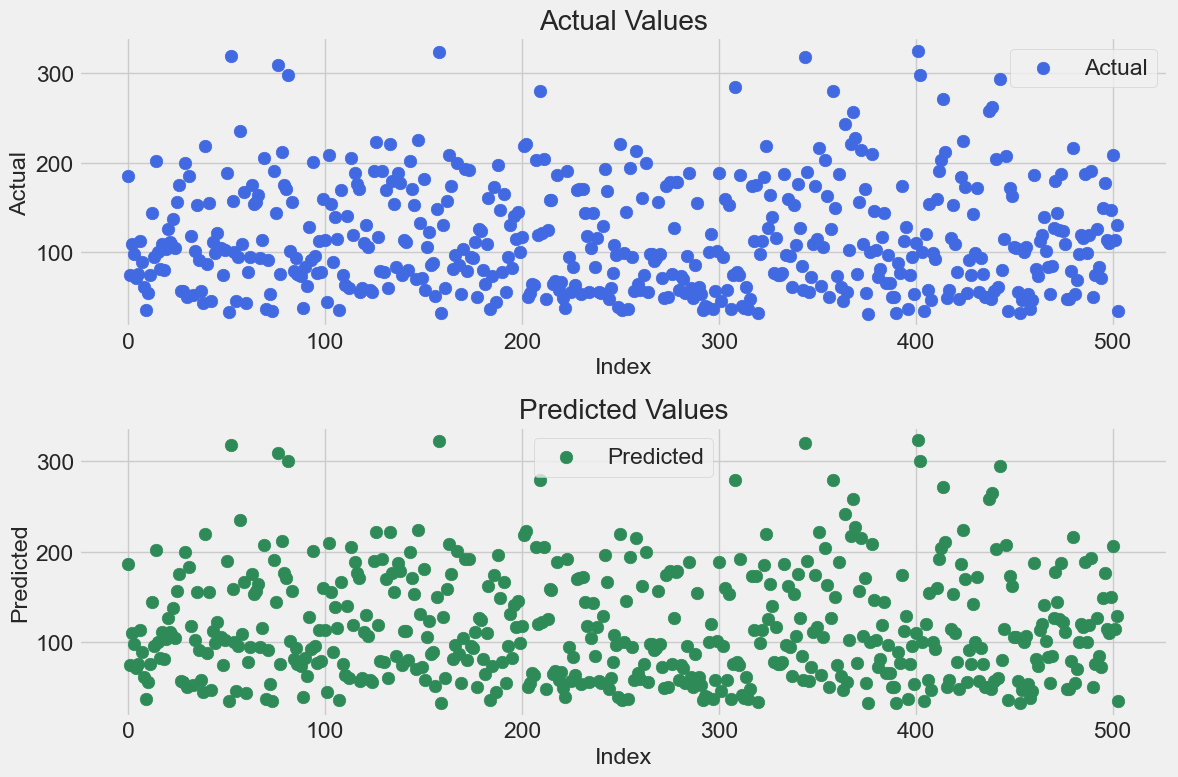

In [37]:
#compare the actual vs predicted value
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

#actual values
ax1.scatter(range(len(y_test)), y_test, label='Actual', color='royalblue')
ax1.set_title('Actual Values')
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual')
ax1.legend()

#predicted values
ax2.scatter(range(len(y_pred)), y_pred, label='Predicted', color='seagreen')
ax2.set_title('Predicted Values')
ax2.set_xlabel('Index')
ax2.set_ylabel('Predicted')
ax2.legend()

plt.tight_layout()
plt.show()

#the actual and predictions values are really similar

In [38]:
#prepare the data for prediction and select the most recent datapoint
X_pred = X[-1:]  

#reshape the input array for prediction
X_pred_scaled = scaler.transform(X_pred) 
X_pred_scaled = np.reshape(X_pred_scaled, (1, -1))  

#make the prediction
y_pred = rf.predict(X_pred_scaled)

#print the predicted price in 1 years 
print(f'Predicted price during year 1: {np.round(y_pred,decimals=2)}')

Predicted price during year 1: [270.18]


NEURAL NETWORK

In [39]:
#import the required libraries 
import numpy as np 
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [40]:
#preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

#split the data into training and testing set
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

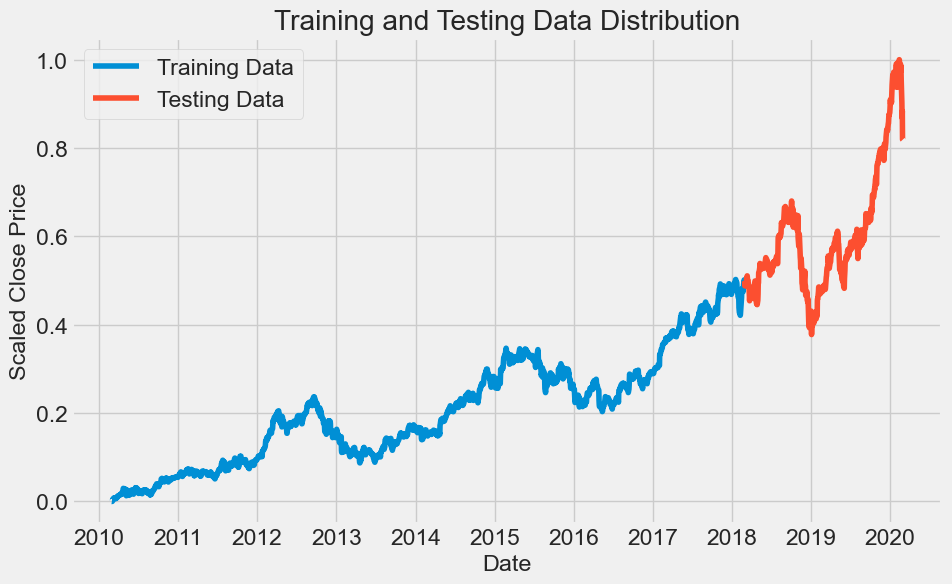

In [41]:
#split the date into training and testing set based on the above ratio 
train_dates = df['Date'][:train_size]
test_dates = df['Date'][train_size:]

#plot the training and testing set 
plt.figure(figsize=(10, 6))
plt.plot(train_dates, train_data, label='Training Data')
plt.plot(test_dates, test_data, label='Testing Data')
plt.title('Training and Testing Data Distribution')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


In [42]:
#prepare the data for LSTM input
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length-1])  
    return np.array(X), np.array(y)


#set the sequence length and create the train and test set based on the data and length
seq_length = 30
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [43]:
#create the LSTM model 
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#2nd layer of LSTM model 
model.add(LSTM(units=64, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
#3rd layer of LSTM model 
model.add(LSTM(units=32, return_sequences=True, activation='relu'))
model.add(Dropout(0.5))

#add a Dense layer
model.add(Dense(units=1, activation='sigmoid'))

#get a summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 32)            12416     
                                                                 
 dropout_2 (Dropout)         (None, 30, 32)            0         
                                                                 
 dense (Dense)               (None, 30, 1)             3

In [44]:
#compile the model 
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

#train the LSTM model w/ early_stop 
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

#get the loss value and validation loss 
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f'Final Loss: {final_loss}, Final Validation Loss: {final_val_loss}')

Final Loss: 0.0011050703469663858, Final Validation Loss: 0.030012501403689384


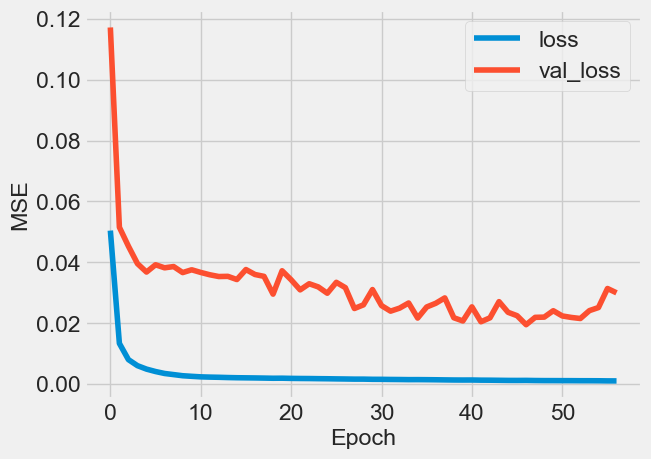

In [45]:
#create a function to plot the history 
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

#implement the function 
plot_loss(history)

In [46]:
#use the trained LSTM model to make predictions on the test dataset
y_pred = model.predict(X_test)

#reshape the predicted values to match the original shape
y_pred_reshaped = y_pred.reshape(-1, 1)

#obtain the actual values by transforming the inverse of the predicted value
y_pred_actual = scaler.inverse_transform(y_pred_reshaped)
actual_price = scaler.inverse_transform(y_test.reshape(-1, 1))

#obtain the shape of the actual and predicted for references 
print(actual_price.shape)
print(y_pred_actual.shape)

15/15 [==============================] - 0s 6ms/step
(475, 1)
(14250, 1)


/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_10213/1448784065.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_dates[seq_length+1:seq_length+1+len(y_test[seq_length:])], y_test[seq_length:].flatten(), label='Predicted')
/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_10213/1448784065.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_dates[seq_length:seq_length+len(y_test[seq_length:])], y_test[seq_length:].flatten(), label

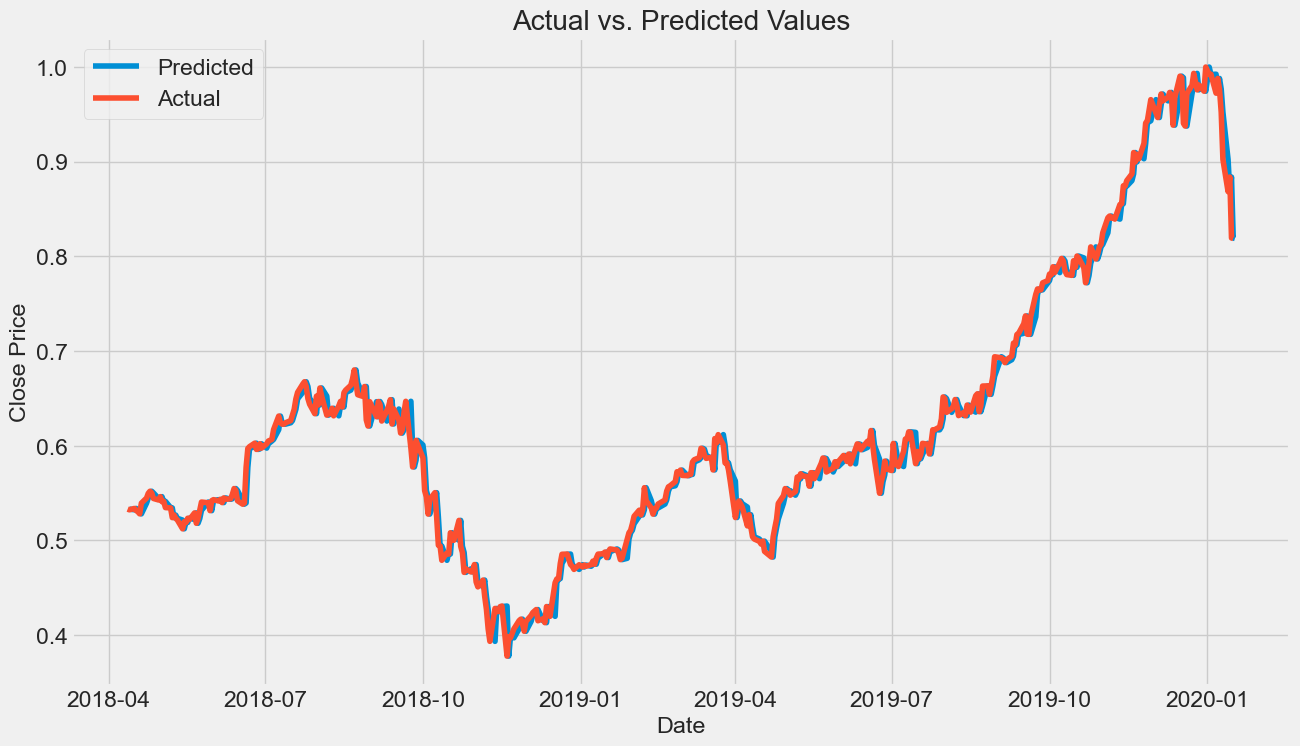

In [47]:
#plot the predicted and actual price based on the model result from above
plt.figure(figsize=(14, 8))
plt.plot(test_dates[seq_length+1:seq_length+1+len(y_test[seq_length:])], y_test[seq_length:].flatten(), label='Predicted')
plt.plot(test_dates[seq_length:seq_length+len(y_test[seq_length:])], y_test[seq_length:].flatten(), label='Actual')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [51]:
#create a function to predict future price 
def predict_future_price(y_pred_actual):
    # Generate noise and randomness for the next 3 years
    np.random.seed(42)
    noise = np.random.normal(0, 0.1, 3)  
    randomness = np.random.uniform(-0.1, 0.2, 3)  
    
    #apply the noise and randomness to the prediction 
    future_prices = []
    for i in range(1, 4):
        price = y_pred_actual * (1 + noise[i-1]) + randomness[i-1]
        future_prices.append(price)
    return future_prices

predicted_future_prices = predict_future_price(y_pred_actual)

#print the predicted price for the next 3 year 
for i, price in enumerate(predicted_future_prices, start=1):
    print(f"Predicted price in year {i}: {price}")


Predicted price in year 1: [[152.58546]
 [165.59831]
 [171.93678]
 ...
 [255.29362]
 [252.05067]
 [249.40671]]
Predicted price in year 2: [[143.35187]
 [155.57753]
 [161.53258]
 ...
 [239.8469 ]
 [236.80013]
 [234.3161 ]]
Predicted price in year 3: [[154.75148]
 [167.9515 ]
 [174.38115]
 ...
 [258.9369 ]
 [255.64732]
 [252.96532]]
